In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
tesla_ticker = yf.Ticker("TSLA")

# Display basic information about the stock
print(tesla_ticker.info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [6]:
tesla_ticker = yf.Ticker("TSLA")

# Extract Tesla historical stock data
tesla_data = tesla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the HTML text as a variable
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the table containing Tesla Revenue
tables = soup.find_all("table")  # Find all tables in the webpage

# Extract the correct table (adjust index if needed)
tesla_revenue = pd.read_html(str(tables[0]))[0]  # Use the first table

# Step 4: Rename the columns to "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Step 5: Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 6: Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 7: Convert Revenue to numeric and Date to datetime
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 8: Display the last five rows of the dataframe
print(tesla_revenue.tail())


                            Date  Revenue
8  1970-01-01 00:00:00.000002013   2013.0
9  1970-01-01 00:00:00.000002012    413.0
10 1970-01-01 00:00:00.000002011    204.0
11 1970-01-01 00:00:00.000002010    117.0
12 1970-01-01 00:00:00.000002009    112.0


In [9]:
import yfinance as yf

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract GameStop historical stock data
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the HTML text as a variable
html_data_2 = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Locate the table containing GameStop Revenue
tables = soup.find_all("table")  # Find all tables in the webpage

# Extract the correct table (adjust index if needed)
gme_revenue = pd.read_html(str(tables[1]))[0]  # Use the correct index for the revenue table

# Step 4: Rename the columns to "Date" and "Revenue"
gme_revenue.columns = ["Date", "Revenue"]

# Step 5: Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 6: Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Convert the Revenue column to numeric and the Date column to datetime
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Step 7: Display the last five rows of the dataframe
print(gme_revenue.tail())


         Date  Revenue
57 2006-01-31   1667.0
58 2005-10-31    534.0
59 2005-07-31    416.0
60 2005-04-30    475.0
61 2005-01-31    709.0


In [14]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 140.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 161.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price", color="blue")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Close Price (USD)", fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()


In [17]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))

    # Plot stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="blue")

    # Plot revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color="orange")

    plt.title(f"{title} Stock Price and Revenue (Up to June 2021)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()


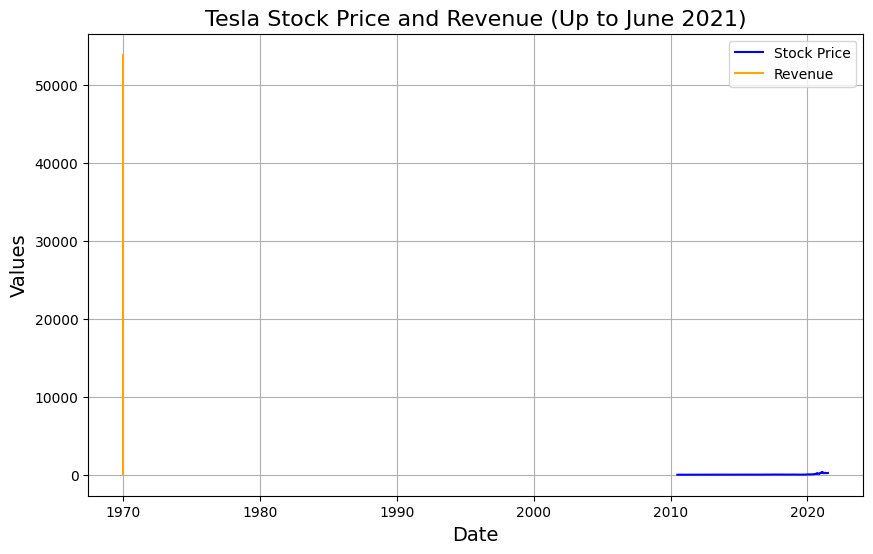

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the Date columns are timezone-naive
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date']).dt.tz_localize(None)

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= pd.to_datetime("2021-06-30")]
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= pd.to_datetime("2021-06-30")]

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="blue")
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color="orange")
    plt.title(f"{title} Stock Price and Revenue (Up to June 2021)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()

# Plot the graph
make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla')


In [27]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="blue")
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color="orange")
    plt.title(f"{title} Stock Price and Revenue (Up to June 2021)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.grid()
    plt.legend()
    plt.show()


In [28]:
import pandas as pd

# Ensure the Date columns are timezone-naive
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']).dt.tz_localize(None)

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= pd.to_datetime("2021-06-30")]
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= pd.to_datetime("2021-06-30")]


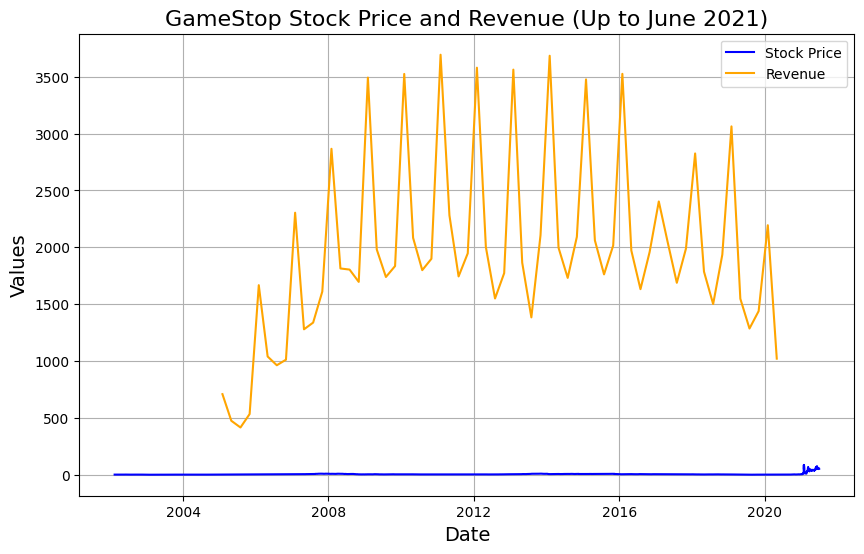

In [29]:
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')
